## Классная работа

[ 6.61896121e-06  2.41756736e-06  6.56561896e-02 -3.26858243e-02
  1.15518264e-03]
0.053329455578030496


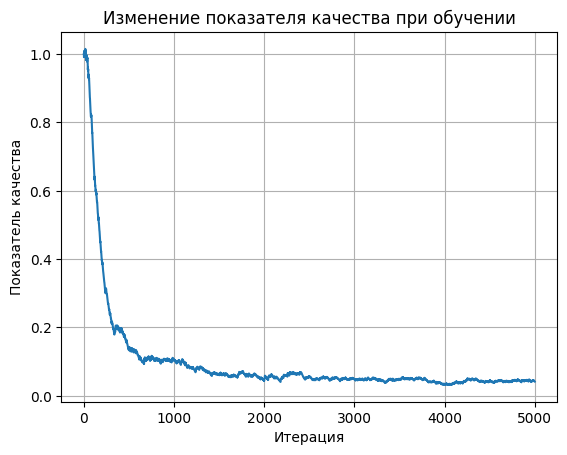

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))


# производная сигмоидной функции потерь по вектору wj
def df(w, x, y):
    L1 = 1.0
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)


# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [10 * x[0], 10 * x[1], 5 * (x[0] + x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])
cl1 = x_train[np.where(y_train == 1)]
cl2 = x_train[np.where(y_train == -1)]

fn = len(x_train[0])
n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(fn)  # начальные весовые коэффициенты
nt = 0.00001  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 5000  # число итераций SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD (L1 учтен внутри функции градиента)
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # истинное значение эмпирического риска после обучения
print(w)
print(Q)

plt.plot(Q_plot)
plt.xlabel('Итерация')
plt.ylabel('Показатель качества')
plt.title('Изменение показателя качества при обучении')
plt.grid(True)
plt.show()


## Домашняя работа

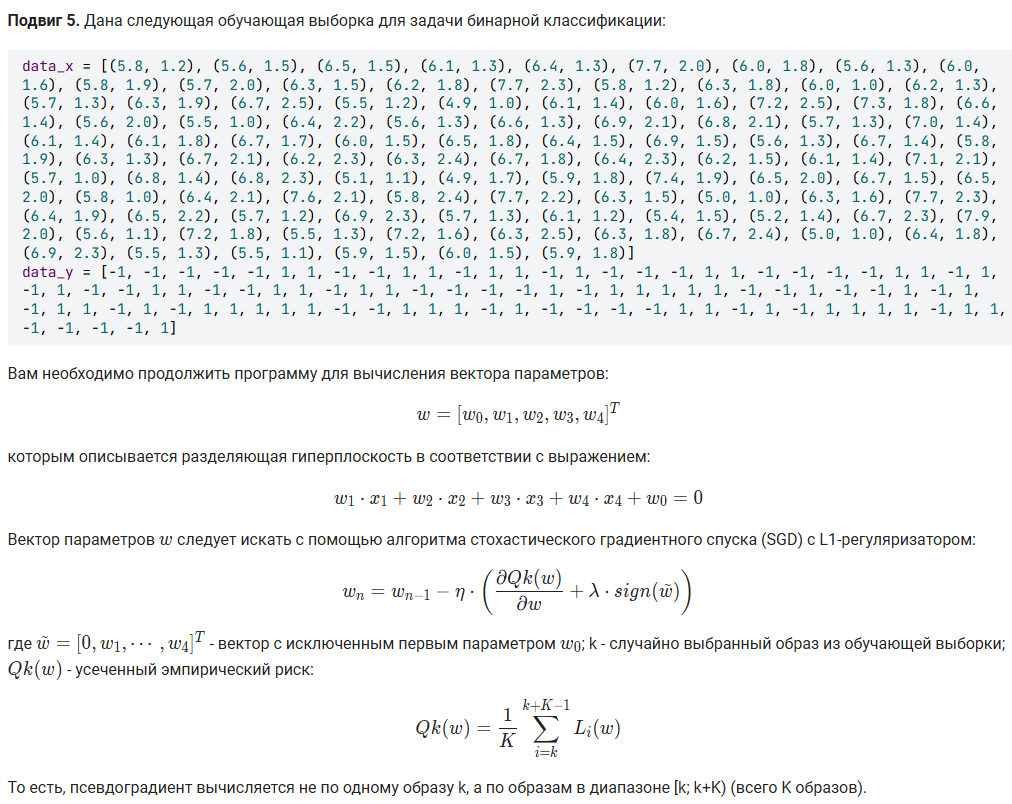
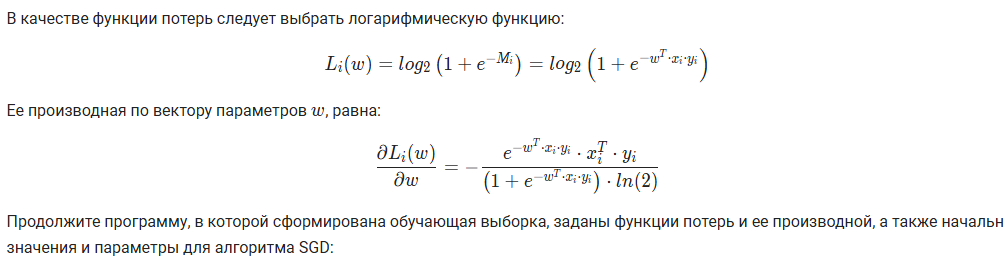
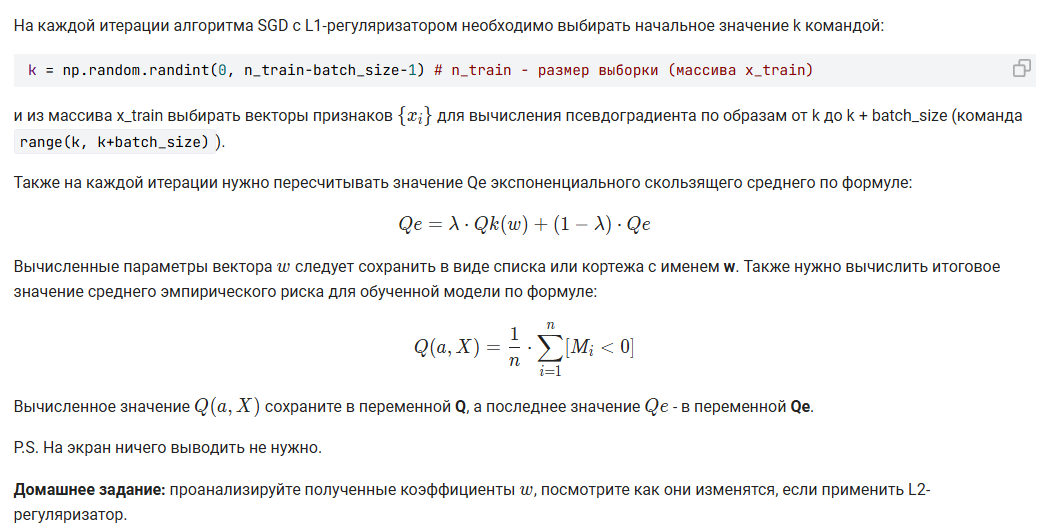

In [19]:
import numpy as np


# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.mean(np.log2(1 + np.exp(-M)))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))

def df_all(w, x, y):
    return np.mean([df(w, xx.T, yy) for xx, yy in zip(x, y)], axis=0)


data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

x_train = np.array([[1, x[0], x[1], 0.8*x[0], (x[0]+x[1])/2] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(len(x_train[0])).T  # начальные нулевые весовые коэффициенты
nt = np.array([0.5] + [0.01] * (len(w) - 1))  # шаг обучения для каждого параметра w0, w1, w2, ...
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)
lm_l1 = 0.05 # параметр лямбда для L1-регуляризатора

Qe = loss(w, x_train.T, y_train) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(N):
    k = np.random.randint(0, n_train-batch_size-1)
    eps = loss(w, x_train[k:k+batch_size].T, y_train[k:k+batch_size])
    w = w - nt * (df_all(w, x_train[k:k+batch_size], y_train[k:k+batch_size]) + lm_l1 * np.sign(np.concatenate(([0], w[1:]))))
    Qe = lm * eps + (1 - lm) * Qe
Q = np.mean(w @ x_train.T * y_train < 0)
Q, Qe, w

(0.09,
 0.7925973483927083,
 array([-3.67012934,  0.12260854,  0.66859677,  0.05038683,  0.39510265]))

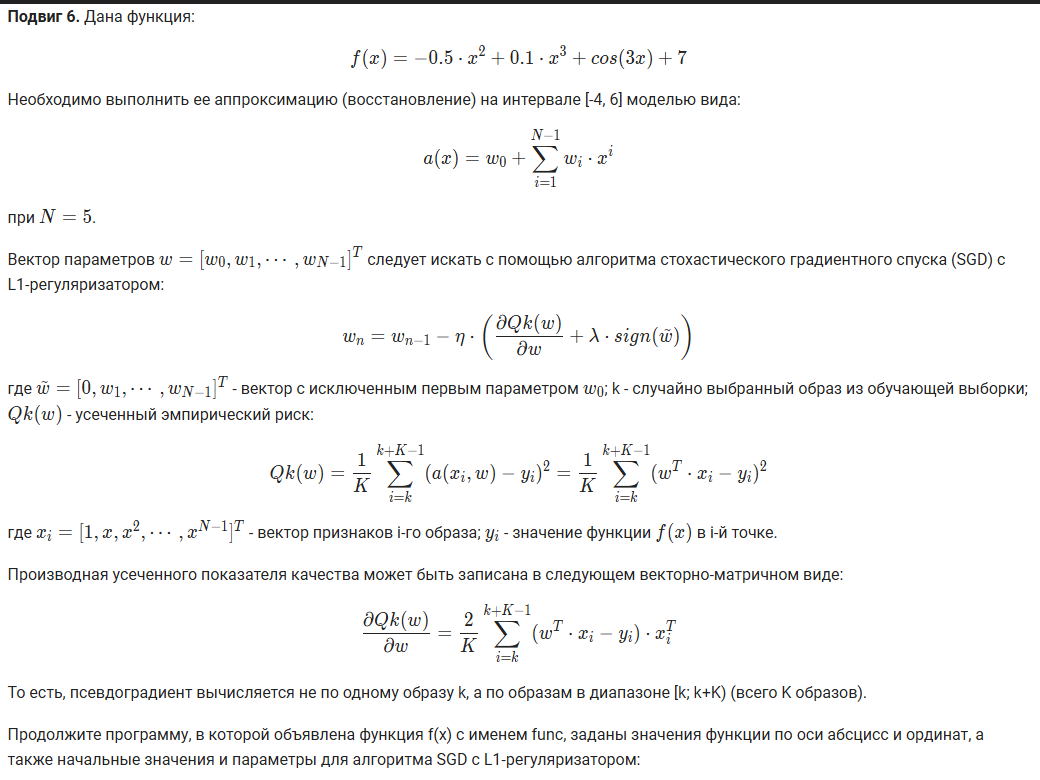
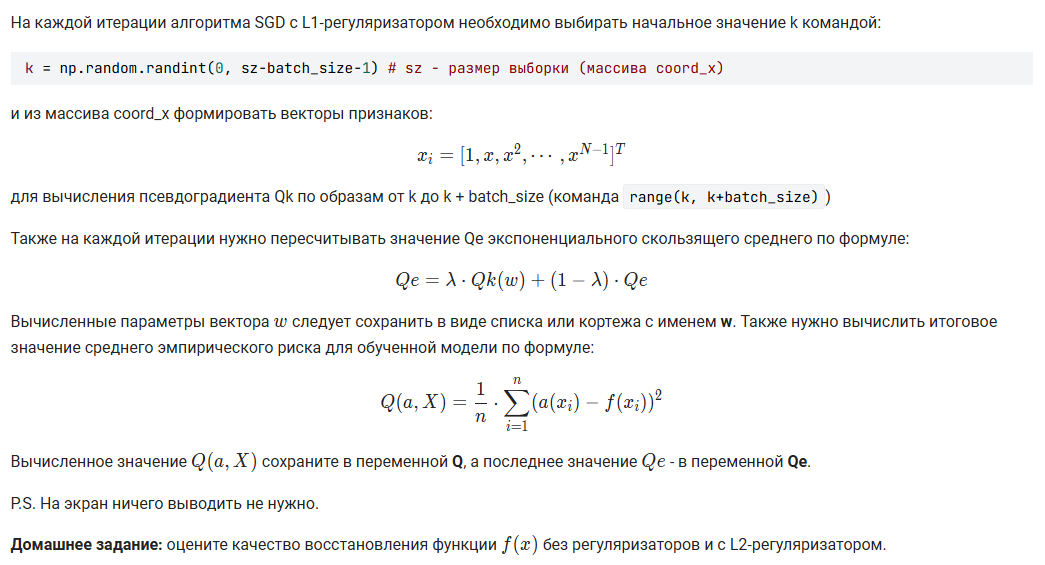

In [25]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return -0.5 * x ** 2 + 0.1 * x ** 3 + np.cos(3 * x) + 7


# модель
def model(w, x):
    return w.T @ x


# функция потерь
def loss(w, x, y):
    return np.mean((model(w, x) - y) ** 2)


# производная функции потерь
def dL(w, x, y):
    return 2/batch_size * (model(w, x) - y) @ x.T


coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

N = 5 # сложность модели (полином степени N-1)
lm_l1 = 2.0 # коэффициент лямбда для L1-регуляризатора
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N).T # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)

X = np.array([[x ** i for i in range(N)] for x in coord_x])
Y = coord_y

Qe = loss(w, X.T, Y) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

# здесь продолжайте программу
for i in range(n_iter):
    k = np.random.randint(0, sz-batch_size-1)
    eps = loss(w, X[k:k+batch_size].T, Y[k:k+batch_size])
    w = w - eta * (dL(w, X[k:k+batch_size].T, Y[k:k+batch_size]) + lm_l1 * np.sign(np.concatenate(([0], w[1:]))))
    Qe = lm * eps + (1 - lm) * Qe

Q = loss(w, X.T, Y)
Q, Qe, w

(0.9359802301238244,
 5.156438618560909,
 array([ 6.72521145,  0.04001613, -0.30835061,  0.10324907, -0.00739641]))